# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [62]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [4]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


## (1) For each of the first 5 training examples, print the text of the message along with the label.

In [5]:
def P1(num_examples=5):
    ### STUDENT START ###
    #Loop through the subset of training examples
    for i in range(num_examples):
        print('\033[1m\033[4mExample {0:0.0f}\033[0m'.format(i+1))
        print('\033[1mLabel: '+newsgroups_train.target_names[train_labels[i]]+"\033[0m")
        print('\033[1mMessage: \033[0m\n')
        print(train_data[i]+"\n")
    ### STUDENT END ###
P1()

Example 1
Label: comp.graphics
Message: 

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Example 2
Label: talk.religion.misc
Message: 



Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such ev

## (2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

#### The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

#### a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

#### b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

#### c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

#### d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

#### e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

#### f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [6]:
def P2():
    ### STUDENT START ###
    #Initializes the vectorizer
    CountVec = CountVectorizer()
    #Transforms the the dataset to a sparse matrix where each word is represented by a column
    vec_train_data = CountVec.fit_transform(train_data)
    print('\033[1m\033[4mQuestion 2a.\033[0m')
    #Gets the number of columns from the transformed data
    print('The size of the vocabulary is {0:,.0f}'.format(vec_train_data.shape[1]))
    #Uses the NNZ function (Number of non-zeros) divided by the number of rows to determine average words per row
    print('The average number of non-zero features per example is {0:,.0f}'.format(vec_train_data.nnz/
                                                                                    vec_train_data.shape[0]))
    #Uses the NNZ function (Number of non-zeros) divided by the number of rows to determine average words per row
    print('The fraction of entries in the matrix that are non-zero is {0:.2f}%'.format((vec_train_data.nnz*1.0
                                                                                        /(vec_train_data.shape[0]*
                                                                                          vec_train_data.shape[1]))
                                                                                       *100))

    print('\n\033[1m\033[4mQuestion 2b.\033[0m')
    #Uses the get_feature_names from the CountVectorizer to find the feature strings at each index specified
    print('The first feature string is "{}"'.format(CountVec.get_feature_names()[0]))
    print('The last feature string is "{}"'.format(CountVec.get_feature_names()[-1]))

    #Trains the Count Vectorizer using only the sepcified vocab words
    vocab = ["atheism", "graphics", "space", "religion"]
    CountVecVocab = CountVectorizer(vocabulary=vocab)
    vec_train_data_2 = CountVecVocab.fit_transform(train_data)
    print('\n\033[1m\033[4mQuestion 2c.\033[0m')
    #Checks the shape of this new data confirms the expected size
    print('The shape of the training data {} by {}, which matches expecations'.format(vec_train_data_2.shape[0],
                                                                                vec_train_data_2.shape[1]))
    #Look at average number of non-zero features per row
    print('The average number of non-zero features per example for the data trained on the select vocab list is {0:,.2f}'
          
          .format(float(vec_train_data_2.nnz)/vec_train_data_2.shape[0]))


    print('\n\033[1m\033[4mQuestion 2d.\033[0m')
    #Use the CountVectorizer for bigram charecters
    CountVecVocab2d = CountVectorizer(analyzer='char',ngram_range=(2,2))
    vec_train_data_2d = CountVecVocab2d.fit_transform(train_data)
    print('The size of the vocabulary for the bigram character features is {0:,.0f}'
          .format(vec_train_data_2d.shape[1]))
    #Use the CountVectorizer for trigram charecters
    CountVecVocab3d = CountVectorizer(analyzer='char',ngram_range=(3,3))
    vec_train_data_3d = CountVecVocab3d.fit_transform(train_data)
    print('The size of the vocabulary for the trigram character features is {0:,.0f}'
          .format(vec_train_data_3d.shape[1]))

    print('\n\033[1m\033[4mQuestion 2e.\033[0m')
    #Trims words that appear fewer than 10x
    CountVecPrun = CountVectorizer(min_df=10)
    train_data_prun = CountVecPrun.fit_transform(train_data)
    print('The size of the vocabulary after pruning words that appear in fewer than 10 documents is {0:,.0f}'
          .format(train_data_prun.shape[1]))

    print('\n\033[1m\033[4mQuestion 2f.\033[0m')
    #Intializes a CountVectorizer for Dev_Data
    CountVecDev = CountVectorizer()
    #Transforms the the dataset to a sparse matrix where each word is represented by a column, here we use the dev_data
    vec_train_data = CountVecDev.fit_transform(dev_data)
    #Finds the variables in the dev data not in the training data
    DevNotInTrain = len(set(CountVecDev.get_feature_names()).difference(set(CountVec.get_feature_names()))) 
    print('There are {0:,.0f} words in the dev data that are missing from the vocabulary built from the training data'
          .format(DevNotInTrain))
    print('This means that the missing words are {0:0.0f}% the length of the training data vocabulary'
          .format((float(DevNotInTrain)/len(set(CountVec.get_feature_names())))*100))
    ### STUDENT END ###
    
P2()

Question 2a.
The size of the vocabulary is 26,879
The average number of non-zero features per example is 96
The fraction of entries in the matrix that are non-zero is 0.36%

Question 2b.
The first feature string is "00"
The last feature string is "zyxel"

Question 2c.
The shape of the training data 2034 by 4, which matches expecations
The average number of non-zero features per example for the data trained on the select vocab list is 0.27

Question 2d.
The size of the vocabulary for the bigram character features is 3,291
The size of the vocabulary for the trigram character features is 32,187

Question 2e.
The size of the vocabulary after pruning words that appear in fewer than 10 documents is 3,064

Question 2f.
There are 4,027 words in the dev data that are missing from the vocabulary built from the training data
This means that the missing words are 15% the length of the training data vocabulary


### (3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

#### a. Why doesn't nearest neighbors work well for this problem?

#### b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

#### c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [10]:
def P3():
    ### STUDENT START ###
    #Intializes a CountVectorizer for Dev_Data
    CV3 = CountVectorizer()
    #Transfroms the train_data
    vec_train_data = CV3.fit_transform(train_data)
    #Transforms the dev_data
    vec_dev_data = CV3.transform(dev_data)

    Ks = list(range(1,101))
    best_k = 0
    best_k_score = 0
    #Loops through a list of Ks 1 to 100
    for i in Ks:
        #Builds the nearest neighbor classifier
        KN = KNeighborsClassifier(n_neighbors=i)
        #Fits the nearest neighbor
        KN.fit(vec_train_data,train_labels)
        #Gets the f1 score
        score = metrics.f1_score(dev_labels,KN.predict(vec_dev_data),average='weighted')
        #If this f1 score is better than the current best f1 score, update the best f1 score
        if score > best_k_score:
            best_k = i
            best_k_score = score

    print('\n\033[1m\033[4mK-Nearest Neighbors\033[0m')
    print('The best choice for k is {0:.0f}, with a f1_score of {1:.1f}%'.format(best_k,best_k_score*100))

    print('\n\033[1m\033[4mMultinomial Naive Bayes\033[0m')
    best_a = 0
    best_a_score = 0
    alphas = list(np.arange(0,1,0.001))
    #loop through the alphas 0 to 1 at 0.001 intervals
    for i in alphas:
        #Initializes the MNB using the alpha = i
        MNB = MultinomialNB(alpha = i)
        #Fits the model
        MNB.fit(vec_train_data, train_labels)
        #Finds the f1 score
        score = metrics.f1_score(dev_labels, MNB.predict(vec_dev_data), average='weighted')

        #If this f1 score is better than the current best f1 score, update the best f1 score
        if score > best_a_score:
            best_a_score = score
            best_a = i
    print('The best choice for alpha is {0:.3f}, with a f1_score of {1:.1f}%'.format(best_a,best_a_score*100))

    print('\n\033[1m\033[4mLogistic Regression\033[0m')
    best_c = 0
    best_c_score = 0
    Cs = list(np.arange(0.01,0.1,0.01))+list(np.arange(0.1,1,0.05))+list(np.arange(1,10,1))
    for i in Cs:
        #Initializes the LR using the C = i and l2 regularization
        lr  = LogisticRegression(C=i,penalty='l2')
        #Fit the model
        lr.fit(vec_train_data,train_labels)
        #Calculates the sum of squared weights
        x = np.sum(lr.coef_**2,axis=1)
        print('Where C = {0:.3f}, the sum of squared weights are [{1:.3f} {2:.3f} {3:.3f} {4:.3f}]'.
              format(i,x[0],x[1],x[2],x[3]))
        #Calculates the f1 score
        score = metrics.f1_score(dev_labels, lr.predict(vec_dev_data), average='weighted')

        # Finding/Replacing the best parameters:
        if score > best_c_score:
            best_c_score = score
            best_c = i
    print('')
    print('The best choice for C is {0:.3f}, with a f1_score of {1:.1f}%'.format(best_c,best_c_score*100))
    ### STUDENT END ###

P3()


K-Nearest Neighbors
The best choice for k is 97, with a f1_score of 46.4%

Multinomial Naive Bayes
The best choice for alpha is 0.262, with a f1_score of 79.2%

Logistic Regression
Where C = 0.010, the sum of squared weights are [2.541 2.940 2.862 2.250]
Where C = 0.020, the sum of squared weights are [5.471 5.876 5.941 4.668]
Where C = 0.030, the sum of squared weights are [8.399 8.619 8.926 7.098]
Where C = 0.040, the sum of squared weights are [11.269 11.206 11.810 9.497]
Where C = 0.050, the sum of squared weights are [14.073 13.671 14.605 11.861]
Where C = 0.060, the sum of squared weights are [16.804 16.026 17.314 14.176]
Where C = 0.070, the sum of squared weights are [19.477 18.304 19.950 16.454]
Where C = 0.080, the sum of squared weights are [22.086 20.482 22.516 18.685]
Where C = 0.090, the sum of squared weights are [24.630 22.604 25.017 20.877]
Where C = 0.100, the sum of squared weights are [27.136 24.660 27.459 23.026]
Where C = 0.150, the sum of squared weights are [38

#### ANSWER:
- A) The nearest neighbors doesn't work well for this problem because of the vocabulary size. Nearest neighbor classification often suffer for high demensionality problems, which is what we have in this problem. Using such a high k value results in us overfitting the training data, which is why we have such a low best f1 score when applying the model to the dev data.
- B) The Naive Bayes model generally works better for smaller datasets because it is generated from a join density function based on the assumption that the features are conditionally independent, which assigns a low but non-zero probability when the dev data has features not previously seen in the training data. The logistic method tends to overfit in smaller datasets as it tries to minimize the error function, which may not work well when the dev set has features not seen in the training data.
- C) We can see from our examples that as we increase C, we increase the sum of squared weights. A higher value of C increase the penalty for overfitting the model, which means that a large portion of the outliers will not be captured by the model. This will increase the unexplained variability of our model.

### (4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [11]:
def make_df(coefficients,feature_names):
    ### STUDENT START ###
    #Builds a dataframe of the coefficients with the target_names as the columns
    df = pd.DataFrame(coefficients,columns=newsgroups_train.target_names)
    #Makes the DataFrame index the feature names
    df.index = feature_names
    #Finds the top 5 features for each of the target names
    alt_atheism = df.sort_values('alt.atheism',ascending=False)[:5]
    comp_graphics = df.sort_values('comp.graphics',ascending=False)[:5]
    sci_space = df.sort_values('sci.space',ascending=False)[:5]
    talk_religion_misc = df.sort_values('talk.religion.misc',ascending=False)[:5]
    #Builds master data class
    total_df = alt_atheism.append(comp_graphics).append(sci_space).append(talk_religion_misc)
    return total_df 
    ### STUDENT END ###

def P4():
    ### STUDENT START ###
    #Unigram Feature Section 
    print('\n\033[1m\033[4mUnigram Features\033[0m')
    #Intializes a CountVectorizer for Dev_Data
    CV4_uni = CountVectorizer()
    #Transfroms the train_data
    vec_train_data_uni = CV4_uni.fit_transform(train_data)
    #Transforms the dev_data
    vec_dev_data_uni = CV4_uni.transform(dev_data)
    #Initializes the LR using the C = 0.55 (The best C from the last model) and l2 regularization
    lr_uni  = LogisticRegression(penalty='l2',C=0.55)
    #Fits the LR model to the training data
    lr_uni.fit(vec_train_data_uni, train_labels)
    #Takes the LR coefficients and transposes them to fit the dataframe. Also passes the feature name. 
    #A Dataframe is returned
    uni_df = make_df(lr_uni.coef_.T,CV4_uni.get_feature_names())
    print(uni_df)

    #Bigram Feature Section 
    print('\n\033[1m\033[4mBigram Features\033[0m')
    #Intializes a CountVectorizer for Dev_Data
    CV4_bi = CountVectorizer(ngram_range=(2,2))
    #Transfroms the train_data
    vec_train_data_bi = CV4_bi.fit_transform(train_data)
    #Transforms the dev_data
    vec_dev_data_bi = CV4_bi.transform(dev_data)
    #Initializes the LR using the C = 0.55 (The best C from the last model) and l2 regularization
    lr_bi  = LogisticRegression(penalty='l2',C=0.55)
    #Fits the LR model to the training data
    lr_bi.fit(vec_train_data_bi, train_labels)
    #Takes the LR coefficients and transposes them to fit the dataframe. Also passes the feature name. 
    #A Dataframe is returned
    bi_df = make_df(lr_bi.coef_.T,CV4_bi.get_feature_names())
    print(bi_df)
    ### STUDENT END ###

P4()


Unigram Features
            alt.atheism  comp.graphics  sci.space  talk.religion.misc
atheists       0.860338      -0.094164  -0.274634           -0.663167
bobby          0.845821      -0.195499  -0.293898           -0.397430
religion       0.818974      -0.523268  -0.676525           -0.053145
atheism        0.814398      -0.359795  -0.378286           -0.384411
deletion       0.769615      -0.266052  -0.289402           -0.284766
graphics      -0.656295       1.667386  -1.133658           -0.643781
image         -0.484338       1.148527  -0.692842           -0.392904
file          -0.282719       1.087761  -0.699333           -0.521358
3d            -0.311020       0.966801  -0.588346           -0.325849
computer       0.080976       0.862350  -0.584809           -0.407784
space         -1.088026      -1.142998   1.903677           -0.998101
orbit         -0.358880      -0.574347   1.040770           -0.516125
nasa          -0.479408      -0.420247   0.872742           -0.410438
la

#### ANSWER:
In the unigram features, most of the top features are descriptive words which directly relate to the classification labels. 

In the bigram features "cheers kent" appears in two target labels, alt.atheism and talk.religion.misc. This is suprising as we would expect any shared phrases to be common words. Along those lines several of the other bigram features are combinations of common words such as "it was" or "is there". In fact, two of the features with the largest weights under the alt.atheism label are just reversals of two common words, "you are" and "are you". Also worth mentioning is that the largest weights are lower than they were for the unigram features.



### (5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [13]:
import string
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
    ### STUDENT START ###
    #Change encoding
    s  = s.encode('utf-8')
    #Makes all strings lowercase
    s = s.lower()
    #Remove punctuation
    s = str(s).translate(None,string.punctuation)
    #Replaces all numbers with -99
    s = re.sub('((0.)?([0-9]+))',r'-99',s)
    #For determining the optimal word length cutoff, I have referenced: http://norvig.com/mayzner.html
    #According to this:
            #"And here is the breakdown of mentions (in millions) by word length (looking like a Poisson distribution). 
            #The average is 4.79 letters per word, and 80% are between 2 and 7 letters long."
    #As a result we will trim all words over 7 letters long to 7 letters
    #Found  ReGex logic https://stackoverflow.com/questions/6853698/regex-to-truncate-long-words-and-append-ellipses
    s = re.sub('(?<=(\s\w{7}))(\w*)','',s)
    return s
    ### STUDENT END ###
    

def P5():
    ### STUDENT START ###
    #Trains the Count Vectorizer with no prepocessing
    cv_empt = CountVectorizer(preprocessor=empty_preprocessor)
    #Transforms the training data
    train_empt = cv_empt.fit_transform(train_data)
    #Transforms the dev data using the training data transform
    dev_empt = cv_empt.transform(dev_data)
    #Initializes the LR using the C = 0.55 (The best C from p3) and l2 regularization
    lr_empt  = LogisticRegression(penalty='l2',C=0.55)
    #Fits the LR model to the training data
    lr_empt.fit(train_empt, train_labels)
    print('F1 Score with no Preprocessing: {0:.2f}%'.format(metrics.f1_score(dev_labels,
                                                              lr_empt.predict(dev_empt),average='weighted')*100))

    #Trains the Count Vectorizer with prepocessing
    cv_pre = CountVectorizer(preprocessor=better_preprocessor)
    #Transforms the training data using the preprocessing fit transform
    train_pre = cv_pre.fit_transform(train_data)
    #Transforms the dev data using the preprocessing training data transform
    dev_pre = cv_pre.transform(dev_data)
    #Initializes the LR using the C = 0.55 (The best C from p3) and l2 regularization
    lr_pre = LogisticRegression(penalty='l2',C=0.55)
    #Fits the LR model to the training data
    lr_pre.fit(train_pre, train_labels)   
    print('F1 Score with Preprocessing: {0:.2f}%'.format(metrics.f1_score(dev_labels,
                                                              lr_pre.predict(dev_pre),average='weighted')*100))


    print('')
    print('The length of the features without preprocessing is {0:,.0f}'.format(len(cv_empt.get_feature_names())))
    print('The length of the features after preprocessing is {0:,.0f}'.format(len(cv_pre.get_feature_names())))
    ### STUDENT END ###

P5()

F1 Score with no Preprocessing: 70.37%
F1 Score with Preprocessing: 71.30%

The length of the features without preprocessing is 33,291
The length of the features after preprocessing is 21,851


### (6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

#### Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

#### Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

##### Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

The number of non-zero items using L1 regularization is 1,243
The number of non-zero items using L2 regularization is 107,516

Vocab Length and Accuracy for different values of C
Value for C: 0.01 | Vocab Length:    18 | Accuracy: 46.30%
Value for C: 0.02 | Vocab Length:    41 | Accuracy: 53.54%
Value for C: 0.03 | Vocab Length:    64 | Accuracy: 57.80%
Value for C: 0.04 | Vocab Length:    99 | Accuracy: 59.24%
Value for C: 0.05 | Vocab Length:   122 | Accuracy: 61.51%
Value for C: 0.06 | Vocab Length:   136 | Accuracy: 61.70%
Value for C: 0.07 | Vocab Length:   155 | Accuracy: 61.48%
Value for C: 0.08 | Vocab Length:   171 | Accuracy: 63.93%
Value for C: 0.09 | Vocab Length:   185 | Accuracy: 66.46%
Value for C: 0.10 | Vocab Length:   205 | Accuracy: 67.67%
Value for C: 0.15 | Vocab Length:   303 | Accuracy: 68.27%
Value for C: 0.20 | Vocab Length:   365 | Accuracy: 68.50%
Value for C: 0.25 | Vocab Length:   426 | Accuracy: 68.52%
Value for C: 0.30 | Vocab Length:   525 | Accuracy: 67

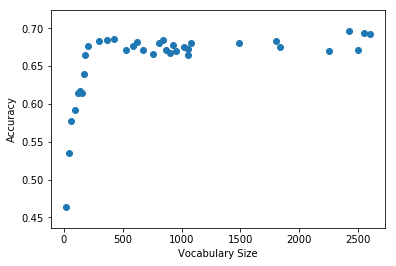

In [19]:
def model_C_Adjustment(CV6,c_var,vec_train_data,vec_dev_data):
    #Trains the logistic regression model using the C value of c_var
    lr_temp = LogisticRegression(penalty='l1',C=c_var,tol=0.01)
    lr_temp.fit(vec_train_data,train_labels)
    #Convert it to a dataframe to make it easier to work with
    df = pd.DataFrame(lr_temp.coef_).T
    df.index = CV6.get_feature_names()
    #Find the non_zero values
    df = df[df.sum(1) <> 0]
    #Count vectorizer with vocabulary set using the new vocab list of non-zeros
    cv_reformat = CountVectorizer(vocabulary=df.index)
    vec_train_reformat = cv_reformat.fit_transform(train_data)
    vec_dev_reformat = cv_reformat.transform(dev_data)
    #Retrains the LR model after trimming the vocabulary
    lr_reformat = LogisticRegression(penalty='l2',C=c_var,tol=0.01)
    lr_reformat.fit(vec_train_reformat, train_labels)
    return {len(df):metrics.f1_score(dev_labels,lr_reformat.predict(vec_dev_reformat),average='weighted')}
    
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)
    ### STUDENT START ###
    CV6 = CountVectorizer()
    vec_train_data = CV6.fit_transform(train_data)
    vec_dev_data = CV6.transform(dev_data)
    #Initializes the LR using the C = 0.55 (The best C from p3) and l1 regularization
    lr_l1 = LogisticRegression(C=0.55,penalty='l1')
    lr_l1.fit(vec_train_data,train_labels)
    print('The number of non-zero items using L1 regularization is {0:,.0f}'.format(np.count_nonzero(lr_l1.coef_)))
    #Initializes the LR using the C = 0.55 (The best C from p3) and l2 regularization
    lr_l2 = LogisticRegression(C=0.55,penalty='l2')
    lr_l2.fit(vec_train_data,train_labels)
    print('The number of non-zero items using L2 regularization is {0:,.0f}'.format(np.count_nonzero(lr_l2.coef_)))
    
    #Create a list of Cs to iterate through
    Cs = list(np.arange(0.01,0.1,0.01))+list(np.arange(0.1,1,0.05))+list(np.arange(1,10,1))
    Values = {}
    print('\n\033[1m\033[4mVocab Length and Accuracy for different values of C\033[0m')
    for c in Cs:
        temp_dict = model_C_Adjustment(CV6,c,vec_train_data,vec_dev_data)
        Values.update(temp_dict)
        print('Value for C: {0:2.2f} | Vocab Length: {1:5,d} | Accuracy: {2:2.2f}%'
              .format(c,temp_dict.keys()[0],temp_dict.values()[0]*100))
            
    print('\n\033[1m\033[4mPlotting Accuracy vs Vocab Size\033[0m') 
    #Plots the results    
    plt.scatter(Values.keys(),Values.values());
    plt.xlabel('Vocabulary Size');
    plt.ylabel('Accuracy');
    ### STUDENT END ###

P6()

### (7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

#### Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

##### maximum predicted probability / predicted probability of the correct label

#### What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [226]:
def GetColFromLabel(row):
    ### STUDENTSTART ###
    #Function for use in the DF.Apply to get the column value of a label
    return row[int(row.Labels)]
    ## STUDENT END ###

def P7():
    ### STUDENTSTART ###
    #Train the TFID Vectorizer
    TV = TfidfVectorizer()
    #Fit the training and dev data
    tv_train_data = TV.fit_transform(train_data)
    tv_dev_data = TV.transform(dev_data)

    #Train the logistic regression model using the L2 Penalty and a C of 100
    lr_tv = LogisticRegression(penalty='l2',C=100)
    lr_tv.fit(tv_train_data,train_labels)
    #Determine the predicted probabilities
    tv_prob = lr_tv.predict_proba(tv_dev_data)
    #Prints the F1 Score
    print('The logistic model with a C=100 and feature vectors constructed with the TfidfVectorizer is {0:0.2f}%'
          .format(metrics.f1_score(dev_labels, lr_tv.predict(tv_dev_data), average='weighted')*100))
    #Creates dataframe for easier useage
    df = pd.DataFrame(tv_prob)
    #Find the max probaility of each example
    df['Max'] = df.max(axis=1)
    #Add the Labels to the DataFrame
    df['Labels'] = pd.Series(dev_labels)
    #Find the Probability of the Actual Label
    df['LabelProbability'] = df.apply(GetColFromLabel,axis=1)
    #Calculate the R Value
    df['R'] = np.round(df['Max']/df['LabelProbability'],2)
    #Find the Max Value
    df= df.sort_values('R',ascending=False)

    #Makes a label index for use in examining top features
    label_df = pd.DataFrame(lr_tv.coef_).T
    label_df.index = TV.get_feature_names()

    #Loop through the top 3 values
    for i,x in enumerate(df.iloc[0:3].index.values):
        StrVals = {1:'largest',2:'2nd largest',3:'3rd largest'}
        #Prints the results
        print('\n\033[1m\033[4mThe {0} R value is {1:0.2f}\033[0m'.format(StrVals[i+1],df.loc[x,'R'])) 
        print('')
        print('\033[1mThe predicted label for this article is {}\033[0m'
              .format(newsgroups_train.target_names[df[[0,1,2,3]].idxmax(axis=1)[x]]))
        print('\033[1mThe actual label for this article is {}\033[0m'.
              format(newsgroups_train.target_names[df.loc[x,'Labels']]))

        print(dev_data[x])

        #Finds the top features for this bad prediction
        print('')
        print('\033[1mThe top 10 features used to make the false prediction for this article are:\033[0m')
        #Finds the non_zero features
        temp_list = list(np.nonzero(tv_dev_data[x])[1])
        Max_DF = None
        #Loops through the non_zero features and finds the score
        for j in temp_list:
            if Max_DF is None:
                Max_DF = label_df[label_df.index == TV.get_feature_names()[j]]
                Max_DF.is_copy= False
                #Calculates the frequency of occrance in the training data
                Max_DF['% of Train Articles'] = len(np.nonzero(tv_train_data[:,j])[0])*1.0/tv_train_data.shape[0]
            else:
                temp_label_df=label_df[label_df.index == TV.get_feature_names()[j]]
                temp_label_df.is_copy= False
                #Calculates the frequency of occrance in the training data
                temp_label_df['% of Train Articles'] = len(np.nonzero(tv_train_data[:,j])[0])*1.0/tv_train_data.shape[0]
                Max_DF = Max_DF.append(temp_label_df) 
        max_label = df[[0,1,2,3]].idxmax(axis=1)[x]
        Max_DF = Max_DF.sort_values(max_label,ascending=False).head(10)
        Max_DF = Max_DF.rename(columns={i:name for i,name in enumerate(newsgroups_train.target_names)})
        print(Max_DF)
    ## STUDENT END ###

P7()

The logistic model with a C=100 and feature vectors constructed with the TfidfVectorizer is 75.98%

The largest R value is 929.36

The predicted label for this article is comp.graphics
The actual label for this article is talk.religion.misc
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual cost

#### ANSWER:
CountVectorizer is simple count of word frequencies while TfidfVectorizer uses a Term-Frequency*Inverse Document-Frequency adjustment. In the TfidfVectorizer: $tf(t,d)*\log\frac{1+n_d}{1+df(d,t)} +1$, where tf(t,d) is the number of occurences of term t in a given document d, $n_d$ is the number of documnets, and df(d,t) is the number of documents containing term t. Common stop words carry very little meaningful information for classifcation, but can mask the signifance of more relavant words, which the TfidVectorizer tries to account for by reducing the factor weighting for these frequent terms.

One noteable thing, is that the 2 largest R values, carry a similar mistake in that they both contain words commonly associated with tech, for example FTP occurs in both the mis-labels. FTP occurs in just 3.6% of the training data, so perhaps it would be useful to exclude some of these rarely used words by coming up with a word usage cutoff that the word must appread in atleast 5% of all articles. 

Additionally, and perhaps more concerning, is that the top 10 features in all 3 articles are heavily made of stop words. Even after the TFID adjustment, these frequently used words are still heavily weighting the labeling of these articles with poor R ratios, which is likely still masking important features like Mormon. One future model improvement would be to take advantage of the TfidfVectorizer's ability to remove stop words. We did not make that adjustment here as the default is none.

### (8) EXTRA CREDIT
#### Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.